In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.tri as tri
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
from matplotlib.colors import Normalize, TwoSlopeNorm

In [267]:
import h5py

In [268]:
pwd

'/Users/smurugan9/research/aislens'

In [269]:
### Adusimilli datasets

ice_thickness = h5py.File("/Users/smurugan9/research/aislens/aislens_emulation/data/external/AISmeltrates-2018/AIS-heightChanges.h5",'r+')

In [272]:
pre_relax_ic_filepath = "/Users/smurugan9/research/aislens/aislens_emulation/data/external/ISMIP6-2300/"
pre_relax_ic = xr.open_dataset(pre_relax_ic_filepath+ 
                               "AIS_4to20km_r01_20220907_m5_drop_bed_20m_bulldoze_troughs_75_to_400m_Enderby_maxstiffness_0.8_TG_pinning_40maf_bedmap2_surface_ASE_05perc_seafloor_mu.nc")

In [275]:
pre_relax_ic.basalHeatFlux

<xarray.DataArray 'basalHeatFlux' (Time: 1, nCells: 385379)>
[385379 values with dtype=float64]
Dimensions without coordinates: Time, nCells

In [187]:
#data_file_path = "/Users/smurugan9/research/aislens/MALI-ismip6-0721/output-exp01/"
#ds = xr.open_dataset(data_file_path+"output_flux.nc")

data_file_path = "/Users/smurugan9/research/aislens/MALI-ismip6-0721/ntasks72-n16/landice/ismip6_run/ismip6_ais_proj2300/hist_04/output/"
ds = xr.open_dataset(data_file_path+"output_flux_hist.nc")

state_file_path = "/Users/smurugan9/research/aislens/MALI-ismip6-0721/ntasks72-n16/landice/ismip6_run/ismip6_ais_proj2300/hist_04/output/outputs/"
state = xr.open_dataset(state_file_path+"output_states.nc")

In [247]:
forcing_and_initial_cond_path = "/Users/smurugan9/research/aislens/aislens_emulation/data/external/ISMIP6-2300/"
region_mask = xr.open_dataset(forcing_and_initial_cond_path+"AIS_4to20km_r01_20220907.regionMask_ismip6.nc")
initial_cond = xr.open_dataset(forcing_and_initial_cond_path+"relaxed_10yrs_4km.nc")
melt_params = xr.open_dataset(forcing_and_initial_cond_path+"basin_and_coeff_gamma0_DeltaT_quadratic_non_local_after_relaxation.nc")

In [266]:
initial_cond.ismip6_2dThermalForcing

<xarray.DataArray 'ismip6_2dThermalForcing' (Time: 1, nCells: 385379)>
[385379 values with dtype=float64]
Dimensions without coordinates: Time, nCells
Attributes:
    units:      deg. C
    long_name:  thermal forcing for ISMIP6 grounded marine melt method, input...

In [262]:
initial_cond

<xarray.Dataset>
Dimensions:                          (nEdges: 1161656, nCells: 385379,
                                      nVertices: 776277, Time: 1, maxEdges: 9,
                                      TWO: 2, vertexDegree: 3,
                                      nVertInterfaces: 6, maxEdges2: 18,
                                      nISMIP6OceanLayers: 30, nVertLevels: 5)
Dimensions without coordinates: nEdges, nCells, nVertices, Time, maxEdges, TWO,
                                vertexDegree, nVertInterfaces, maxEdges2,
                                nISMIP6OceanLayers, nVertLevels
Data variables: (12/59)
    angleEdge                        (nEdges) float64 ...
    areaCell                         (nCells) float64 ...
    areaTriangle                     (nVertices) float64 ...
    basalHeatFlux                    (Time, nCells) float64 ...
    bedTopography                    (Time, nCells) float64 ...
    cellsOnCell                      (nCells, maxEdges) int32 ...
    ...                               ...
    yCell                            (nCells) float64 ...
    yEdge                            (nEdges) float64 ...
    yVertex                          (nVertices) float64 ...
    zCell                            (nCells) float64 ...
    zEdge                            (nEdges) float64 ...
    zVertex                          (nVertices) float64 ...
Attributes: (12/183)
    model_name:                                             mpas
    core_name:                                              landice
    source:                                                 MPAS
    Conventions:                                            MPAS
    git_version:                                            v2.1.0-alpha.1-22...
    on_a_sphere:                                            NO
    ...                                                     ...
    config_AM_regionalStats_compute_interval:               output_interval
    config_AM_regionalStats_stream_name:                    regionalStatsOutput
    config_AM_regionalStats_compute_on_startup:             YES
    config_AM_regionalStats_write_on_startup:               YES
    file_id:                                                jzt8a2gxaf
    NCO:                                                    netCDF Operators ...

In [238]:
forcing_TF = xr.open_dataset(forcing_and_initial_cond_path+"ctrlAE/AIS_4to20km_r01_20220907_obs_TF_1995-2017_8km_x_60m.nc")
forcing_TF = xr.open_dataset(forcing_and_initial_cond_path+"ctrlAE/AIS_4to20km_r01_20220907_RACMO2.3p2_ANT27_smb_climatology_1995-2017.nc")

In [249]:
m = initial_cond

In [125]:
sorrm_file_path = '/Users/smurugan9/research/aislens/aislens_emulation/data/raw/SORRMv2.1.ISMF/'
sorrm = xr.open_dataset(sorrm_file_path + 'SORRMv2.1.ISMF.0001-0099.nc')

basal_melt_v1 = xr.open_dataset('/Users/smurugan9/research/aislens/aislens_emulation/data/raw/mpaso.hist.am.timeSeriesStatsMonthly.0001-01-01.nc')

In [20]:
regrid_ocean = xr.open_dataset('/Users/smurugan9/research/aislens/aislens_emulation/data/external/ocean.ECwISC30to60E1r02.200408.nc')

In [139]:
regrid_sorrm = xr.open_dataset(sorrm_file_path+'mpaso.SOwISC12to60E2r4.rstFromG-anvil.210203.nc')

In [186]:
regrid_sorrm

<xarray.Dataset>
Dimensions:                        (nCells: 569915, nEdges: 1723935,
                                    nVertices: 1153614, TWO: 2, maxEdges: 7,
                                    maxEdges2: 14, vertexDegree: 3,
                                    nVertLevels: 60, Time: 1,
                                    nVertLevelsP1: 61, nForcingGroupsMax: 4)
Dimensions without coordinates: nCells, nEdges, nVertices, TWO, maxEdges,
                                maxEdges2, vertexDegree, nVertLevels, Time,
                                nVertLevelsP1, nForcingGroupsMax
Data variables: (12/75)
    latCell                        (nCells) float64 1.57 -0.464 ... -0.9334
    lonCell                        (nCells) float64 4.314 0.6292 ... 0.0102
    xCell                          (nCells) float64 -1.316e+03 ... 3.791e+06
    yCell                          (nCells) float64 -3.128e+03 ... 3.867e+04
    zCell                          (nCells) float64 6.371e+06 ... -5.12e+06
    indexToCellID                  (nCells) int32 1 2 3 ... 569913 569914 569915
    ...                             ...
    accumulatedLandIceFrazilMass   (Time, nCells) float64 0.0 0.0 ... 0.0 0.0
    frazilSurfacePressure          (Time, nCells) float64 0.0 0.0 ... 0.0 0.0
    filteredSSHGradientZonal       (Time, nCells) float64 2.642e-08 ... -3.16...
    filteredSSHGradientMeridional  (Time, nCells) float64 -1.184e-07 ... 3.36...
    forcingGroupNames              (Time, nForcingGroupsMax) |S64 b'surfaceSa...
    forcingGroupRestartTimes       (Time, nForcingGroupsMax) |S64 b'0000-02-0...
Attributes: (12/1163)
    on_a_sphere:                                                   YES
    sphere_radius:                                                 6371229.0
    model_name:                                                    mpas
    core_name:                                                     ocean
    history:                                                       Wed Feb  3...
    source:                                                        MPAS
    ...                                                            ...
    config_rx1_zstar_weight:                                       1.0
    config_rx1_horiz_smooth_open_ocean_cells:                      20
    config_rx1_min_levels:                                         3
    config_rx1_min_layer_thickness:                                1.0
    file_id:                                                       7apwyom6ru
    NCO:                                                           netCDF Ope...

In [128]:
flux = sorrm.timeMonthly_avg_landIceFreshwaterFlux
ssh = sorrm.timeMonthly_avg_ssh

In [100]:
regridded_data = xr.open_dataset(sorrm_file_path+"regridded_sorrm.6000.0x6000.0km_4.0km_Antarctic_stereo.nc")
regridded_data

<xarray.Dataset>
Dimensions:                                (Time: 1188, x: 1501, y: 1501)
Coordinates:
  * Time                                   (Time) object 0001-01-16 12:20:00....
  * x                                      (x) float64 -3e+06 ... 3e+06
  * y                                      (y) float64 -3e+06 ... 3e+06
    lat                                    (y, x) float64 ...
    lon                                    (y, x) float64 ...
Data variables:
    timeMonthly_avg_landIceFreshwaterFlux  (Time, y, x) float64 ...

In [140]:
ds = regrid_sorrm

In [246]:
regrid_sorrm

<xarray.Dataset>
Dimensions:                        (nCells: 569915, nEdges: 1723935,
                                    nVertices: 1153614, TWO: 2, maxEdges: 7,
                                    maxEdges2: 14, vertexDegree: 3,
                                    nVertLevels: 60, Time: 1,
                                    nVertLevelsP1: 61, nForcingGroupsMax: 4)
Dimensions without coordinates: nCells, nEdges, nVertices, TWO, maxEdges,
                                maxEdges2, vertexDegree, nVertLevels, Time,
                                nVertLevelsP1, nForcingGroupsMax
Data variables: (12/75)
    latCell                        (nCells) float64 1.57 -0.464 ... -0.9334
    lonCell                        (nCells) float64 4.314 0.6292 ... 0.0102
    xCell                          (nCells) float64 -1.316e+03 ... 3.791e+06
    yCell                          (nCells) float64 -3.128e+03 ... 3.867e+04
    zCell                          (nCells) float64 6.371e+06 ... -5.12e+06
    indexToCellID                  (nCells) int32 1 2 3 ... 569913 569914 569915
    ...                             ...
    accumulatedLandIceFrazilMass   (Time, nCells) float64 0.0 0.0 ... 0.0 0.0
    frazilSurfacePressure          (Time, nCells) float64 0.0 0.0 ... 0.0 0.0
    filteredSSHGradientZonal       (Time, nCells) float64 2.642e-08 ... -3.16...
    filteredSSHGradientMeridional  (Time, nCells) float64 -1.184e-07 ... 3.36...
    forcingGroupNames              (Time, nForcingGroupsMax) |S64 b'surfaceSa...
    forcingGroupRestartTimes       (Time, nForcingGroupsMax) |S64 b'0000-02-0...
Attributes: (12/1163)
    on_a_sphere:                                                   YES
    sphere_radius:                                                 6371229.0
    model_name:                                                    mpas
    core_name:                                                     ocean
    history:                                                       Wed Feb  3...
    source:                                                        MPAS
    ...                                                            ...
    config_rx1_zstar_weight:                                       1.0
    config_rx1_horiz_smooth_open_ocean_cells:                      20
    config_rx1_min_levels:                                         3
    config_rx1_min_layer_thickness:                                1.0
    file_id:                                                       7apwyom6ru
    NCO:                                                           netCDF Ope...

In [134]:
def dist(i1, i2, xCell, yCell):  # helper distance fn
    dist = ((xCell[i1]-xCell[i2])**2 + (yCell[i1]-yCell[i2])**2)**0.5
    return dist

In [135]:
# Loop over runs
# Each run gets its own figure
# Each variable gets its own row
# Each time level gets its own column
varPlot = {}
figs = {}
gs = {}

# Set bitmask values
initialExtentValue = 1
dynamicValue = 2
floatValue = 4
groundingLineValue = 256

sec_per_year = 60. * 60. * 24. * 365.
rhoi = 910.
rhosw = 1028.

In [141]:
# Get mesh geometry and calculate triangulation. 
# It would be more efficient to do this outside
# this loop if all runs are on the same mesh, but we
# want this to be as general as possible.
m = ds  # use run file for mesh variables

In [142]:
variables = ['thickness', 'surfaceSpeed', 'floatingBasalMassBalApplied', 'dHdt']
variables = ['thickness']
variables = ['timeMonthly_avg_landIceFreshwaterFlux']
vmins = [None] * len(variables)
vmaxs = [None] * len(variables)
log_plot = [False] * len(variables)

defaultColors = {'thickness' : 'Blues',
                 'surfaceSpeed' : 'plasma',
                 'basalSpeed' : 'plasma',
                 'bedTopography' : 'BrBG',
                 'floatingBasalMassBalApplied' : 'cividis'
                }
colormaps = []
for variable in variables:
    if variable in defaultColors.keys():
        colormaps.append(defaultColors[variable])
    else:
        # All other variables default to viridis
        colormaps.append('viridis')
        
# List of diverging colormaps for use in plotting bedTopography.
# I don't see a way around hard-coding this.
divColorMaps = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [160]:
f = Dataset(sorrm_file_path + 'mpaso.SOwISC12to60E2r4.rstFromG-anvil.210203.nc')
f.set_auto_mask(False)

In [252]:
m = Dataset(forcing_and_initial_cond_path+"relaxed_10yrs_4km.nc")

In [253]:
xCell = m.variables["yCell"][:]
yCell = m.variables["xCell"][:]
dcEdge = m.variables["dcEdge"][:]

triang = tri.Triangulation(xCell, yCell)
triMask = np.zeros(len(triang.triangles))

maxDist = np.max(dcEdge) * 2.0

In [254]:
for t in range(len(triang.triangles)):
    thisTri = triang.triangles[t, :]
    if dist(thisTri[0], thisTri[1], xCell, yCell) > maxDist:
        triMask[t] = True
    if dist(thisTri[1], thisTri[2], xCell, yCell) > maxDist:
        triMask[t] = True
    if dist(thisTri[0], thisTri[2], xCell, yCell) > maxDist:
        triMask[t] = True
triang.set_mask(triMask)

In [257]:
f = m

ValueError: The length of c must match either the number of points or the number of triangles

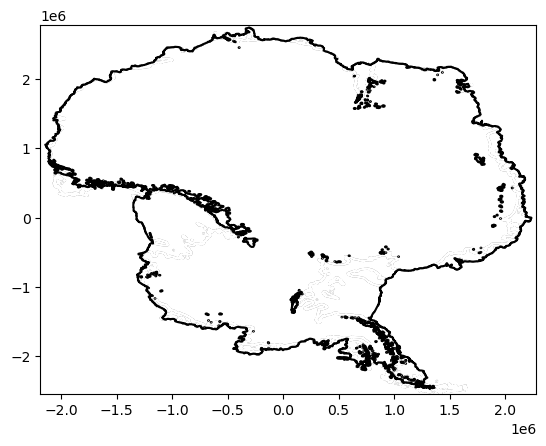

In [260]:
#for timeLev in range(0,len(ds.xtime)):
for timeLev in range(0,3):
    if 'daysSinceStart' in m.variables.keys():
        yr = sorrm.variables['daysSinceStart'][timeLev] / 365.
    else:
        yr = [0.]
    
    # Setup figure
    figs[timeLev] = plt.figure()
    #figs[timeLev].suptitle[timeLev]
    #nRows = len(variables)
    #nCols = len(ds.xtime) + 1
    
    # last column for colorbars
    #gs[timeLev] = gridspec.GridSpec(nRows, nCols,
    #                                height_ratios=[1] * nRows,
    #                                width_ratios=[1] * (nCols - 1) + [0.1])
    #axs = []
    #cbar_axs = []
    
    #for row in np.arange(0, nRows):
    #    cbar_axs.append(plt.subplot(gs[timeLev][row,-1]))
    #    for col in np.arange(0,nCols-1):
    #        if axs==[]:
    #            axs.append(plt.subplot(gs[timeLev][row, col]))
    #        else:
    #            axs.append(plt.subplot(gs[timeLev][row, col], sharex=axs[0], sharey=axs[0]))
                
    varPlot[timeLev] = {} 
    cbars = []
    # Loop over variables
    for row, (variable, log, colormap, vmin, vmax) in enumerate(zip(variables, log_plot, colormaps, vmins, vmaxs)):
        if variable == 'observedSpeed':
            var_to_plot = np.sqrt(m.variables['observedSurfaceVelocityX'][timeLev][:]**2 + 
                                  m.variables['observedSurfaceVelocityY'][timeLev][:]**2)
        else:
            var_to_plot = sorrm.variables[variable][timeLev][:]
        
        #if len(np.shape(var_to_plot)) == 1:
        #    var_to_plot = var_to_plot.reshape((1, np.shape(var_to_plot)[0]))
        
        if 'Speed' in variable:
            units = 'm yr^{-1}'
            var_to_plot *= sec_per_year
        else:
            try:
                units = sorrm.variables[variable].attrs['units']
            except AttributeError:
                units = 'no-units'
            
        if log == 'True':
            var_to_plot = np.log10(var_to_plot)
            var_to_plot[np.isinf(var_to_plot)] = np.nan
            colorbar_label_prefix = 'log10'
        else:
            colorbar_label_prefix = ''
            
        varPlot[timeLev][variable] = []
        
        # Set lower and upper bounds for plotting
        if vmin in ['None', None]:
            # 0.1 m/yr is a pretty good lower bound for speed
            first_quant = np.nanquantile(var_to_plot[:], 0.01)
            if 'Speed' in variable and log == 'True':
                vmin = max(first_quant, -1.)
            else:
                vmin = first_quant
        if vmax in ['None', None]:
            vmax = np.nanquantile(var_to_plot[:], 0.99)
        # Plot bedTopography on an asymmetric colorbar if appropriate
        if ( (variable == 'bedTopography') and
            (np.nanquantile(var_to_plot[:], 0.99) > 0.) and
            (colormap in divColorMaps) ):
            norm = TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=0.)
        else:
            norm = Normalize(vmin=vmin, vmax=vmax)
            
        if 'cellMask' in m.variables.keys():
            calc_mask = True
            cellMask = m.variables["cellMask"][:]
            floatMask = (cellMask & floatValue) // floatValue
            dynamicMask = (cellMask & dynamicValue) // dynamicValue
            groundingLineMask = (cellMask & groundingLineValue) // groundingLineValue
            initialExtentMask = (cellMask & initialExtentValue) // initialExtentValue
        elif ('cellMask' not in m.variables.keys() and
              'thickness' in m.variables.keys() and 
              'bedTopography' in m.variables.keys() ):
            #print(f'cellMask is not present in output file {run}; calculating masks from ice thickness')
            calc_mask = True
            groundedMask = (f.variables['thickness'][:] > (-rhosw / rhoi * f.variables['bedTopography'][:]))
            groundingLineMask = groundedMask.copy()  # This isn't technically correct, but works for plotting
            initialExtentMask = (f.variables['thickness'][:] > 0.)
        else:
            #print(f'cellMask and thickness and/or bedTopography not present in output file  {run};'
            #      ' Skipping mask calculation.')
            calc_mask = False
            
        # Loop over time levels
        # index = row * (nCols - 1) + col
        if calc_mask:
            plt.tricontour(triang, groundingLineMask[0, :],levels=[0.9999], colors='grey',linestyles='solid')
            plt.tricontour(triang, groundingLineMask[timeLev, :],levels=[0.9999], colors='white',linestyles='solid')
            plt.tricontour(triang, initialExtentMask[timeLev, :],levels=[0.9999], colors='black',linestyles='solid')
        #varPlot[timeLev][variable].append(plt.tripcolor(triang, var_to_plot[:], cmap=colormap,shading='flat', norm=norm))
        varPlot[timeLev][variable].append(plt.tripcolor(triang, var_to_plot.where(var_to_plot != 0.),norm=norm, cmap=colormap, shading='flat'))
        plt.colorbar()
        #plt.xlim([-3e6,3e6]);
        #plt.ylim([-3e6,3e6]);
        #plt.set_aspect('equal')
        print("loop {}".format(timeLev))
        #plt.title(f'year = {yr:0.2f}')
        #plt.colorbar()
        plt.show()
        #cbars.append(Colorbar(ax=cbar_ax, mappable=varPlot[timeLev][variable][0], orientation='vertical',
                              #label=f'{colorbar_label_prefix}{variable} (${units}$)'))
    #figs[timeLev].tight_layout()
    #figs[timeLev].savefig(timeLev, dpi=400, bbox_inches='tight')
    

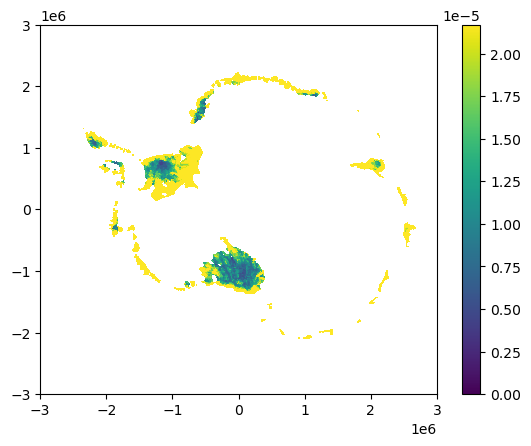

In [230]:
plt.tripcolor(triang, var_to_plot.where(var_to_plot != 0.),norm=norm, shading='flat')
plt.colorbar()
plt.xlim([-3e6,3e6]);
plt.ylim([-3e6,3e6]);

In [212]:
var_to_plot.where(var_to_plot != 0.)

<xarray.Variable (nCells: 569915)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Attributes:
    units:         kg m^-2 s^-1
    long_name:     Flux of mass through the ocean surface. Positive into ocean.
    cell_methods:  Time: mean

In [80]:
calc_mask

False

loop 0


ValueError: Unknown format code 'f' for object of type 'str'

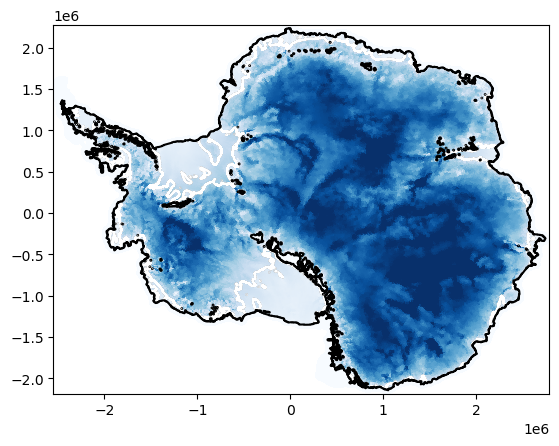

In [129]:
#for timeLev in range(0,len(ds.xtime)):
for timeLev in range(0,1):
    if 'daysSinceStart' in m.variables.keys():
        yr = m.variables['daysSinceStart'][timeLev] / 365.
    else:
        yr = [0.]
    
    # Setup figure
    figs[timeLev] = plt.figure()
    #figs[timeLev].suptitle[timeLev]
    #nRows = len(variables)
    #nCols = len(ds.xtime) + 1
    
    # last column for colorbars
    #gs[timeLev] = gridspec.GridSpec(nRows, nCols,
    #                                height_ratios=[1] * nRows,
    #                                width_ratios=[1] * (nCols - 1) + [0.1])
    #axs = []
    #cbar_axs = []
    
    #for row in np.arange(0, nRows):
    #    cbar_axs.append(plt.subplot(gs[timeLev][row,-1]))
    #    for col in np.arange(0,nCols-1):
    #        if axs==[]:
    #            axs.append(plt.subplot(gs[timeLev][row, col]))
    #        else:
    #            axs.append(plt.subplot(gs[timeLev][row, col], sharex=axs[0], sharey=axs[0]))
                
    varPlot[timeLev] = {} 
    cbars = []
    # Loop over variables
    for row, (variable, log, colormap, vmin, vmax) in enumerate(zip(variables, log_plot, colormaps, vmins, vmaxs)):
        if variable == 'observedSpeed':
            var_to_plot = np.sqrt(m.variables['observedSurfaceVelocityX'][timeLev][:]**2 + 
                                  m.variables['observedSurfaceVelocityY'][timeLev][:]**2)
        else:
            var_to_plot = m.variables[variable][timeLev][:]
        
        #if len(np.shape(var_to_plot)) == 1:
        #    var_to_plot = var_to_plot.reshape((1, np.shape(var_to_plot)[0]))
        
        if 'Speed' in variable:
            units = 'm yr^{-1}'
            var_to_plot *= sec_per_year
        else:
            try:
                units = m.variables[variable].attrs['units']
            except AttributeError:
                units = 'no-units'
            
        if log == 'True':
            var_to_plot = np.log10(var_to_plot)
            var_to_plot[np.isinf(var_to_plot)] = np.nan
            colorbar_label_prefix = 'log10'
        else:
            colorbar_label_prefix = ''
            
        varPlot[timeLev][variable] = []
        
        # Set lower and upper bounds for plotting
        if vmin in ['None', None]:
            # 0.1 m/yr is a pretty good lower bound for speed
            first_quant = np.nanquantile(var_to_plot[:], 0.01)
            if 'Speed' in variable and log == 'True':
                vmin = max(first_quant, -1.)
            else:
                vmin = first_quant
        if vmax in ['None', None]:
            vmax = np.nanquantile(var_to_plot[:], 0.99)
        # Plot bedTopography on an asymmetric colorbar if appropriate
        if ( (variable == 'bedTopography') and
            (np.nanquantile(var_to_plot[:], 0.99) > 0.) and
            (colormap in divColorMaps) ):
            norm = TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=0.)
        else:
            norm = Normalize(vmin=vmin, vmax=vmax)
            
        if 'cellMask' in m.variables.keys():
            calc_mask = True
            cellMask = m.variables["cellMask"][:]
            floatMask = (cellMask & floatValue) // floatValue
            dynamicMask = (cellMask & dynamicValue) // dynamicValue
            groundingLineMask = (cellMask & groundingLineValue) // groundingLineValue
            initialExtentMask = (cellMask & initialExtentValue) // initialExtentValue
        elif ('cellMask' not in f.variables.keys() and
              'thickness' in f.variables.keys() and 
              'bedTopography' in f.variables.keys() ):
            print(f'cellMask is not present in output file {run}; calculating masks from ice thickness')
            calc_mask = True
            groundedMask = (f.variables['thickness'][:] > (-rhosw / rhoi * f.variables['bedTopography'][:]))
            groundingLineMask = groundedMask.copy()  # This isn't technically correct, but works for plotting
            initialExtentMask = (f.variables['thickness'][:] > 0.)
        else:
            print(f'cellMask and thickness and/or bedTopography not present in output file {run};'
                  ' Skipping mask calculation.')
            calc_mask = False
            
        # Loop over time levels
        #index = row * (nCols - 1) + col
        if calc_mask:
            plt.tricontour(triang, groundingLineMask[0, :],levels=[0.9999], colors='grey',linestyles='solid')
            plt.tricontour(triang, groundingLineMask[timeLev, :],levels=[0.9999], colors='white',linestyles='solid')
            plt.tricontour(triang, initialExtentMask[timeLev, :],levels=[0.9999], colors='black',linestyles='solid')
        varPlot[timeLev][variable].append(plt.tripcolor(triang, var_to_plot[:], cmap=colormap,shading='flat', norm=norm))
        #plt.set_aspect('equal')
        print("loop {}".format(timeLev))
        plt.title(f'year = {yr:0.2f}')
        plt.show()
        #cbars.append(Colorbar(ax=cbar_ax, mappable=varPlot[timeLev][variable][0], orientation='vertical',
                              #label=f'{colorbar_label_prefix}{variable} (${units}$)'))
    #figs[timeLev].tight_layout()
    #figs[timeLev].savefig(timeLev, dpi=400, bbox_inches='tight')
    

numpy.timedelta64(0,'ns')